In [12]:
#導入套件
%matplotlib inline
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#導入蠟燭圖套件
import mpl_finance as mpf
#專門抓台股的套件
import twstock

In [13]:
#設定爬蟲股票代號
sid = '2330'
data=twstock.Stock(sid)

In [110]:
#用fetch_from抓取資料，指定日期放入dataframe裡
df = pd.DataFrame(data.fetch_from(2023,1))
#設定index
df.set_index('date', inplace = True)
df.head()

,capacity,turnover,open,high,low,close,change,transaction
date,,,,,,,,
2023-01-03,15311364,6871973708,446.0,453.5,443.0,453.0,4.5,22581
2023-01-04,20626874,9310050329,449.5,455.0,448.5,449.5,-3.5,18233
2023-01-05,23972099,10972616269,459.0,459.5,455.0,458.5,9.0,20752
2023-01-06,21313593,9745142549,455.0,459.5,455.0,458.5,0.0,16635
2023-01-09,49186355,23352375299,468.0,481.0,467.5,481.0,22.5,57305


In [111]:
#設定index格式
df.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 
df.index[::10]

C:\Users\User\AppData\Local\Temp\ipykernel_37788\1927563101.py:2: FutureWarning: DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d'))


Index(['2023-01-03', '2023-01-17', '2023-02-10', '2023-02-24', '2023-03-14',
       '2023-03-28', '2023-04-14', '2023-04-28', '2023-05-15', '2023-05-29',
       '2023-06-12', '2023-06-28', '2023-07-12', '2023-07-26', '2023-08-10',
       '2023-08-24', '2023-09-07', '2023-09-21', '2023-10-06', '2023-10-24',
       '2023-11-07', '2023-11-21', '2023-12-05', '2023-12-19', '2024-01-03',
       '2024-01-17', '2024-01-31', '2024-02-23', '2024-03-11', '2024-03-25',
       '2024-04-10'],
      dtype='object')

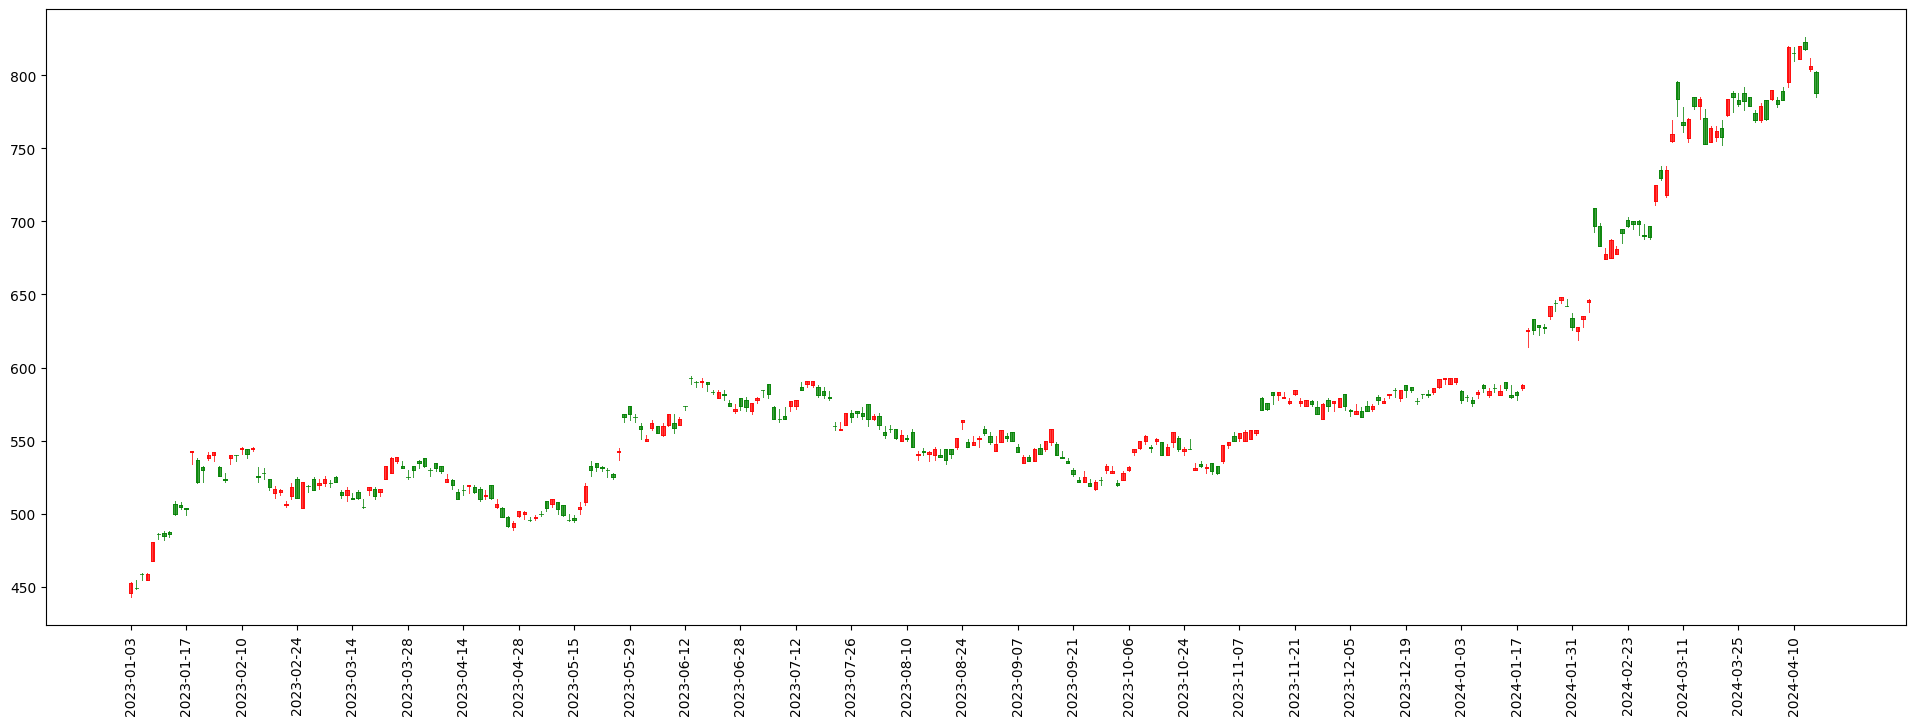

In [112]:
#創建圖框
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
#設定座標數量及所呈現文字
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10],rotation=90)
#使用mpl_finance套件candlestick2_ochl
mpf.candlestick2_ochl(ax, df['open'], df['close'], df['high'],
      df['low'], width=0.6, colorup='r', colordown='g', alpha=0.75);

In [113]:
#將抓取下來的資料進行標準化

C:\Users\User\AppData\Local\Temp\ipykernel_37788\2513525740.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['close'][i] > df['close'][i-1]:
C:\Users\User\AppData\Local\Temp\ipykernel_37788\2513525740.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment i

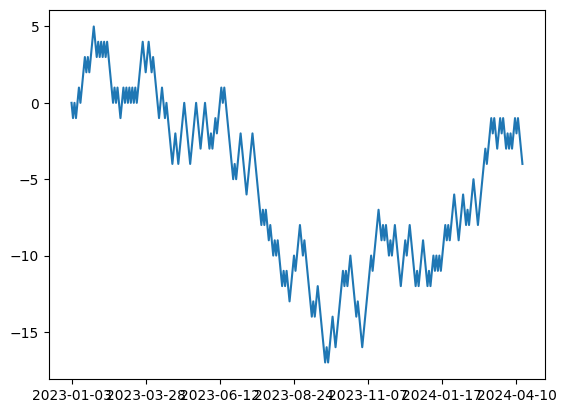

In [114]:
#Try 1
#初始點為0，只要上漲就+1，下跌就-1
df['trend'] = 0
for i in range(1, len(df)):
    if df['close'][i] > df['close'][i-1]:
        df['trend'][i] = 1
    else:
        df['trend'][i] = -1

#圖表是從0開始 之後依照上漲下跌的標記+1或-1畫出
df['trend'] = df['trend'].cumsum()
df['trend'].plot()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_37788\3900769668.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['close'][i] > df['MA5'][i]:
C:\Users\User\AppData\Local\Temp\ipykernel_37788\3900769668.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in 

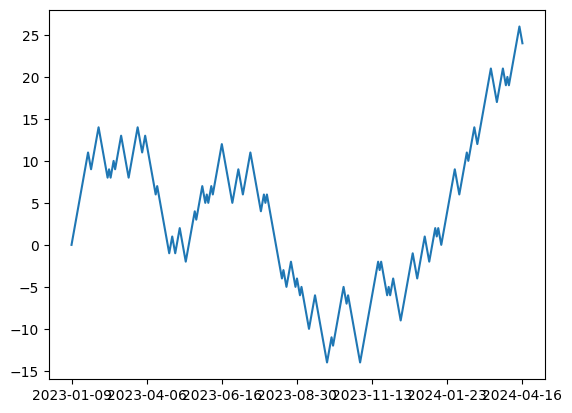

In [115]:
#Try 2
#考慮趨勢方向，只要收盤價大於MA7就+1，小於就-1
df['trend'] = 0
#計算7日均線 MA7 是用前7天的收盤價平均
df['MA5'] = df['close'].rolling(window=5).mean()
#將第一個7日均線以前的資料刪除
df = df.dropna()
#判斷趨勢
for i in range(1, len(df)):
    if df['close'][i] > df['MA5'][i]:
        df['trend'][i] = 1
    else:
        df['trend'][i] = -1

#圖表是從0開始 之後依照上漲下跌的標記+1或-1畫出
df['trend'] = df['trend'].cumsum()
df['trend'].plot()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_37788\25662060.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['close'][i] < df['close'][i-1]:
C:\Users\User\AppData\Local\Temp\ipykernel_37788\25662060.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['close'][i] < df['MA5'][i]:
C:\Users\User\AppData\Local\Temp\ipykernel_37788\25662060.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will neve

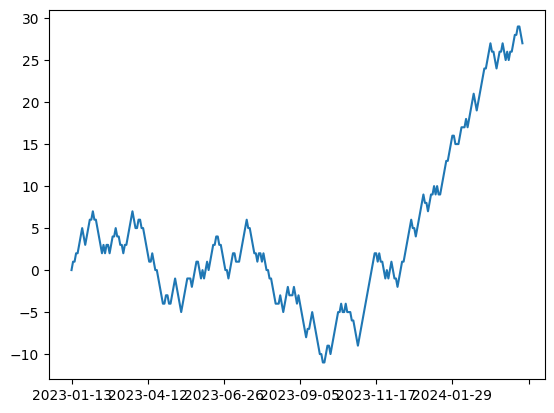

In [116]:
#Final version
#當收盤價在MA7之上，下跌但沒有跌破MA7，則為0
#當收盤價在MA7之下，上漲但沒有突破MA7，則為0
#當收盤價在MA7之上，下跌且跌破MA7，則為-1
#當收盤價在MA7之下，上漲且突破MA7，則為1
df['trend'] = 0
#計算7日均線 MA7 是用前7天的收盤價平均
df['MA5'] = df['close'].rolling(window=5).mean()
#將第一個7日均線以前的資料刪除
df = df.dropna()
#判斷趨勢
for i in range(1, len(df)):
    if df['close'][i] < df['close'][i-1]:
        if df['close'][i] > df['MA5'][i]:
            df['trend'][i] = 0
        else:
            df['trend'][i] = -1
    else:
        if df['close'][i] < df['MA5'][i]:
            df['trend'][i] = 0
        else:
            df['trend'][i] = 1

#圖表是從0開始 之後依照上漲下跌的標記+1或-1畫出
df['trend'] = df['trend'].cumsum()
df['trend'].plot()
plt.show()

#將這個新的資料存到csv檔
df.to_csv('stock_trend.csv')

In [122]:
df['trend'].head()

2023-01-13    0
2023-01-16    1
2023-01-17    1
2023-01-30    2
2023-01-31    2
Name: trend, dtype: int64

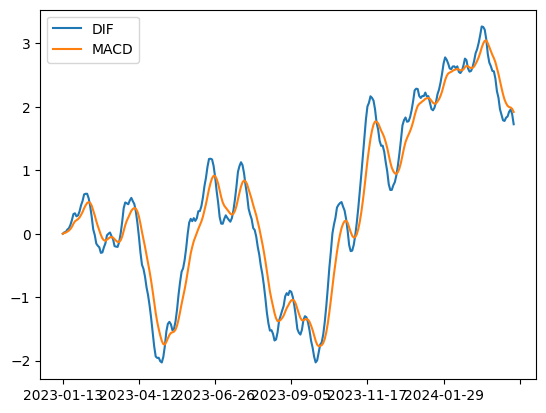

總報酬率: 0.414721723518851


C:\Users\User\AppData\Local\Temp\ipykernel_37788\3668584565.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['MACD'][i] > 0 and df['MACD'][i-1] < 0:
C:\Users\User\AppData\Local\Temp\ipykernel_37788\3668584565.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['MACD'][i] < 0 and df['MACD'][i-1] > 0:
C:\Users\User\AppData\Local\Temp\ipykernel_37788\3668584565.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[

In [117]:
#針對這個新的資料進行MACD交易策略
#設定快慢線 這裡都使用trend欄位 而不是close欄位
df['fast'] = df['trend'].ewm(span=12).mean()
df['slow'] = df['trend'].ewm(span=26).mean()
#計算DIF
df['DIF'] = df['fast'] - df['slow']
#計算MACD
df['MACD'] = df['DIF'].ewm(span=9).mean()
#畫出MACD
df[['DIF', 'MACD']].plot()
plt.show()

#執行交易
#當MACD由負轉正時，全倉買進
#當MACD由正轉負時，全倉賣出
#設定初始資金為1000000
df['capital'] = 1000000
#初始持有股票為0
df['stock'] = 0
#初始狀態為空手
status = 'empty'
#進行交易
for i in range(1, len(df)):
    if df['MACD'][i] > 0 and df['MACD'][i-1] < 0:
        if status == 'empty':
            df['stock'][i] = df['capital'][i] / df['close'][i]
            df['capital'][i] = 0
            status = 'full'
    elif df['MACD'][i] < 0 and df['MACD'][i-1] > 0:
        if status == 'full':
            df['capital'][i] = df['stock'][i] * df['close'][i]
            df['stock'][i] = 0
            status = 'empty'
    else:
        df['capital'][i] = df['capital'][i-1] 
        df['stock'][i] = df['stock'][i-1]
#計算總資產
df['total'] = df['capital'] + df['stock'] * df['close']
#計算報酬率 不用輸出圖表 只要看報酬率
print('總報酬率:', end=' ')
print((df['total'][-1] - df['total'][0]) / df['total'][0])



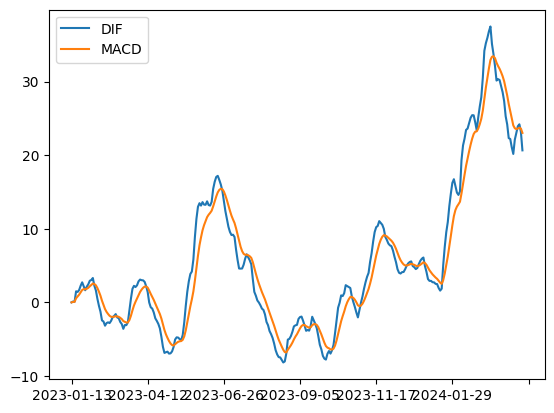

總報酬率: 0.41981981981981964


C:\Users\User\AppData\Local\Temp\ipykernel_37788\1515610217.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['MACD'][i] > 0 and df['MACD'][i-1] < 0:
C:\Users\User\AppData\Local\Temp\ipykernel_37788\1515610217.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['MACD'][i] < 0 and df['MACD'][i-1] > 0:
C:\Users\User\AppData\Local\Temp\ipykernel_37788\1515610217.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[

In [118]:
#針對原先的close欄位進行MACD交易策略
#設定快慢線
df['fast'] = df['close'].ewm(span=12).mean()
df['slow'] = df['close'].ewm(span=26).mean()
#計算DIF
df['DIF'] = df['fast'] - df['slow']
#計算MACD
df['MACD'] = df['DIF'].ewm(span=9).mean()
#畫出MACD
df[['DIF', 'MACD']].plot()
plt.show()

#執行交易
#當MACD由負轉正時，全倉買進
#當MACD由正轉負時，全倉賣出
#設定初始資金為1000000
df['capital'] = 1000000
#初始持有股票為0
df['stock'] = 0
#初始狀態為空手
status = 'empty'
#進行交易
for i in range(1, len(df)):
    if df['MACD'][i] > 0 and df['MACD'][i-1] < 0:
        if status == 'empty':
            df['stock'][i] = df['capital'][i] / df['close'][i]
            df['capital'][i] = 0
            status = 'full'
    elif df['MACD'][i] < 0 and df['MACD'][i-1] > 0:
        if status == 'full':
            df['capital'][i] = df['stock'][i] * df['close'][i]
            df['stock'][i] = 0
            status = 'empty'
    else:
        df['capital'][i] = df['capital'][i-1] 
        df['stock'][i] = df['stock'][i-1]

#計算總資產
df['total'] = df['capital'] + df['stock'] * df['close']

#計算報酬率 不用輸出圖表 只要看報酬率
print('總報酬率:', end=' ')
print((df['total'][-1] - df['total'][0]) / df['total'][0])

